# 项目三 基于KNN算法的分类模型

## 项目实训

### KNN算法完成分类任务

#### 本任务的目标：手动生成有两个类别的数据集，把它作为机器学习的训练数据集，用KNN算法进行模型训练，然后对新的未知数据进行分类。

##### 1.生成训练集

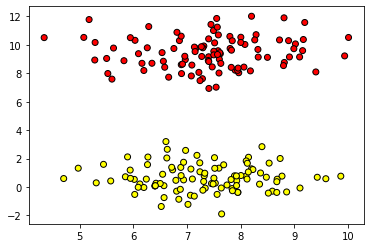

In [7]:
#导入数据集生成器
from sklearn.datasets import make_blobs
#导入KNN分类器
from sklearn.neighbors import KNeighborsClassifier
#导入绘图工具
import matplotlib.pyplot as plt
#导入numpy
import numpy as np
#生成样本数为200、分类数为2的数据集
data = make_blobs(n_samples=200,centers = 2,random_state=8)
#大写的X表示数据的特征，小写的y表示数据对应的标签。
X,y = data
#将生成的数据集进行可视化
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.autumn,edgecolor='k')

##### 2．用KNN算法拟合这些数据

In [8]:
#创建模型
clf = KNeighborsClassifier()
#训练模型
clf.fit(X,y)

KNeighborsClassifier()

##### 3．绘出分类边界，创建分类模型  4.新数据分类预测

C:\Users\admin\AppData\Local\Temp/ipykernel_54760/1530211161.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Pastel1_r)


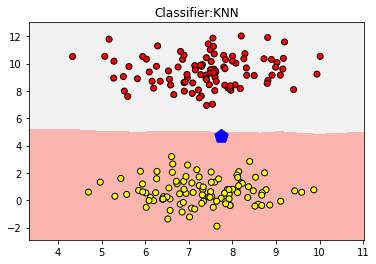

In [9]:
#下面的代码用于画图
x_min,x_max = X[:,0].min()-1,X[:,0].max()+1
y_min,y_max = X[:,1].min()-1,X[:,1].max()+1
#用不同的背景色表示不同的分类
xx,yy = np.meshgrid(np.arange(x_min,x_max,.02),np.arange(y_min,y_max,.02))
Z = clf.predict(np.c_[(xx.ravel(),yy.ravel())]).reshape(xx.shape)
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Pastel1_r)

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.autumn,edgecolor='k')
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title("Classifier:KNN")

#把新的数据点用五边形表示出来
plt.scatter(7.75,4.72,marker='p',c='blue',s=200)
plt.show()

##### 5．验证KNN算法的分类结果

In [10]:
#对数据点分类进行预测
print('\n\n\n')
print('代码运行结果:')
print('====================================')
print('新数据点的分类是:',clf.predict([[7.75,4.72]]))
print('====================================')
print('\n\n\n')





代码运行结果:
新数据点的分类是: [1]






### KNN算法实战—酒的分类

#### 本任务的目标：使用scikit-learn内置的wine数据集作为训练数据集，用KNN算法进行模型训练，然后对新的未知数据进行分类。

#### 1．数据集探索

In [5]:
#导入wine模块
from sklearn.datasets import load_wine
#导入wine数据集
wine_dataset = load_wine()
#导入数据集拆分工具
from sklearn.model_selection import train_test_split
#查看wine数据集的结构
wine_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [6]:
#查看wine数据特征数据的维度
wine_dataset['data'].shape

(178, 13)

In [7]:
#查看wine数据特征的数据描述
print(wine_dataset['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

#### 2．拆分数据集

In [8]:
#将数据集拆分为训练集和测试集
X_train,X_test,y_train,y_test = train_test_split(wine_dataset['data'],wine_dataset['target'],random_state=0)

In [9]:
print("拆分后数据集的形状：")
print("===============================\n")
#输出训练集中特征数据的维度
print('X_train shape:{}'.format(X_train.shape) )
#输出测试集中特征数据的维度
print('X_test shape:{}'.format(X_test.shape) )
#输出训练集中目标数据的维度
print('y_train shape:{}'.format(y_train.shape) )
#输出测试集中目标数据的维度
print('y_test shape:{}'.format(y_test.shape) )
print("\n===============================")

拆分后数据集的形状：

X_train shape:(133, 13)
X_test shape:(45, 13)
y_train shape:(133,)
y_test shape:(45,)



#### 3．用KNN算法拟合训练数据

In [10]:
#导入KNN算法分类模型
from sklearn.neighbors import KNeighborsClassifier
#指定模型的n_neighbors参数值为1
knn = KNeighborsClassifier(n_neighbors = 1)

In [11]:
#训练模型
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

#### 4．使用模型对新样本的分类进行预测

In [12]:
#输出模型得分
print("===============================\n")
print('测试集得分：{:.2f}'.format(knn.score(X_test,y_test)))
print("===============================\n")


测试集得分：0.76



## 项目拓展—辅助诊断乳腺肿瘤

#### 本任务的目标：使用scikit-learn内置的乳腺癌（breast_cancer）数据集，用KNN算法进行分类，判断乳腺肿瘤是良性还是恶性，并尝试调整模型的参数。

##### 1．数据集探索

In [13]:
#导入breast_cancer模块
from sklearn.datasets import load_breast_cancer
#从sklearn的datasets模块载入数据集
cancer = load_breast_cancer()
#打输出breast_cancer数据集中的键
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [14]:
#输出数据的概况
cancer['data'].shape

(569, 30)

In [15]:
#输出breast_cancer数据集中的描述
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

#### 2．拆分数据集

In [16]:
#导入数据集拆分工具
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

##### 3．用KNN算法拟合训练数据

In [17]:
from sklearn.neighbors import KNeighborsClassifier
training_score = []
test_score = []
# n_nighbors取值为从1到10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # 构建模型
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 记录训练集评分
    training_score.append(clf.score(X_train, y_train))
    # 记录测试集评分
    test_score.append(clf.score(X_test, y_test))

##### 4．可视化训练集准确率和测试集准确率

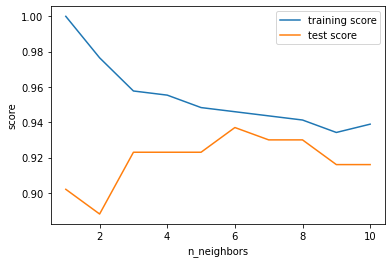

In [18]:
import matplotlib.pyplot as plt
plt.plot(neighbors_settings, training_score, label="training score")
plt.plot(neighbors_settings, test_score, label="test score")
plt.ylabel("score")
plt.xlabel("n_neighbors")
plt.legend()